Matplotlib is building the font cache; this may take a moment.


r_l: 0.00023299999999999999856191423841522691873251460493 m
m_cri: 52.98541892264206154550265637226402759552001953125000 mm^3 * 1e-3

=== Linear Fit on log(m) ===
ln(a): -26.2743758595
a (exp of intercept): 0.0000000000
b (slope): 0.2628444233
transition time 1: 9.9427
slope at transition time: 0.0000000000
mass at transition time: 0.0000000001


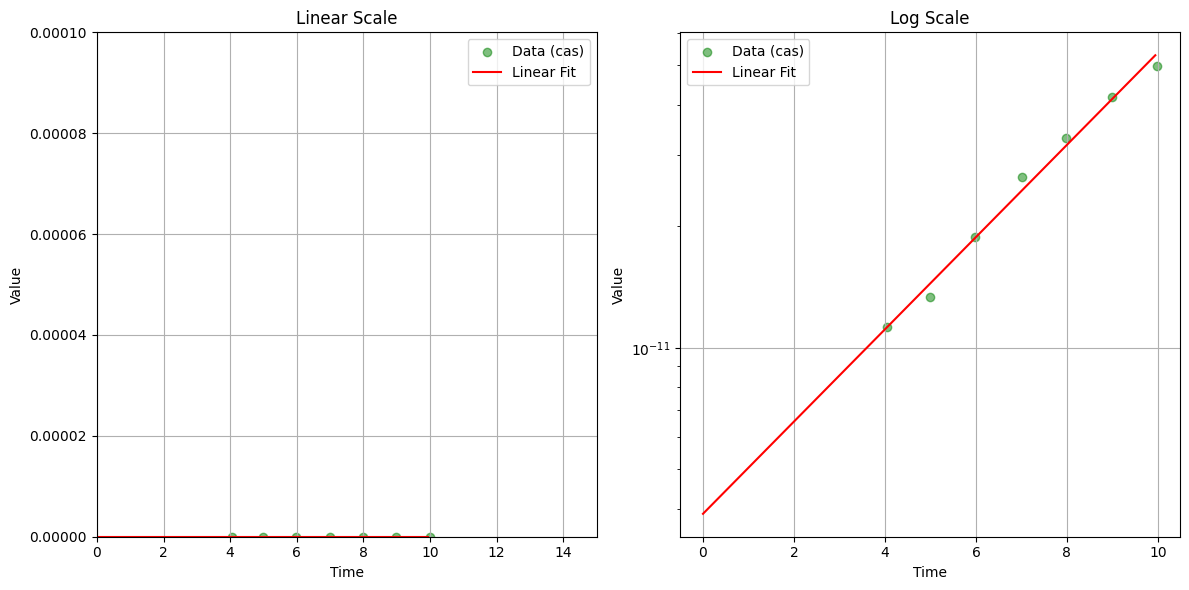

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

D = 2.0e-9          # (m²/s)
p0 = 100 #160            # (mmHg)
a = 7.290693742572903e-07   # (m³/(kg·s))
V = 3.0318e7        # (mmHg·kg/m³)

r_l = np.sqrt(6 * D * p0 / (a * V))
m_cri = 4 * np.pi / 3 * (r_l ** 3)
print(f"r_l: {r_l:.50f} m")
print(f"m_cri: {m_cri*1e12:.50f} mm^3 * 1e-3")

data_con = pd.read_csv('A_cellular_automatonHCT300.csv')
t = data_con['x'].values.astype(float)
d = data_con['Curve1'].values.astype(float)
m = 4 * np.pi / 3 * ((d * 1e-6 / 2) ** 3)

m0 = 4*np.pi*(r_l**3)/3#5.2985418922642075e-05 #1.2115931075920437e-05 #5.2985418922642075e-05 # 1.2115931075920437e-05  #0.000023228
gamma = 0.78 #0.829
beta = 3/4#0.85#2/3/gamma
exponent = 1 - beta

# 筛选 t <= 8
mask = m <= m0
t_filtered = t[mask]
m_filtered = m[mask]

m_filtered_log = np.log(m_filtered)
coefficients = np.polyfit(t_filtered, m_filtered_log, 1)

b_opt = coefficients[0]  # 斜率
a_opt_log = coefficients[1]  # 截距
a_p = np.exp(a_opt_log)

print("\n=== Linear Fit on log(m) ===")
print(f"ln(a): {a_opt_log:.10f}")
print(f"a (exp of intercept): {a_p:.10f}")
print(f"b (slope): {b_opt:.10f}")

transition_cas = float(np.log(m0 / a_p) / b_opt)
print(f"transition time 1: {transition_cas:.4f}")

d_tran = a_p * b_opt * np.exp(b_opt * transition_cas)
print(f"slope at transition time: {d_tran:.10f}")

m_tran = a_p * np.exp(b_opt * transition_cas)
print(f"mass at transition time: {m_tran:.10f}")


t_cas_final = np.linspace(0, transition_cas, 100)
simple_exponential_fit = a_p * np.exp(b_opt * t_cas_final)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(t_filtered, m_filtered, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final, simple_exponential_fit, 'r-', label='Linear Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Scale')
plt.xlim(0, 15)
plt.ylim(0, 1e-4)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(t_filtered, m_filtered, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final, simple_exponential_fit, 'r-', label='Linear Fit')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Log Scale')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== Linear Fit on log(m) ===
ln(a_2): -24.5491248891
a_2 (exp of intercept): 0.0000000000
b_2 (slope): 0.1003419756


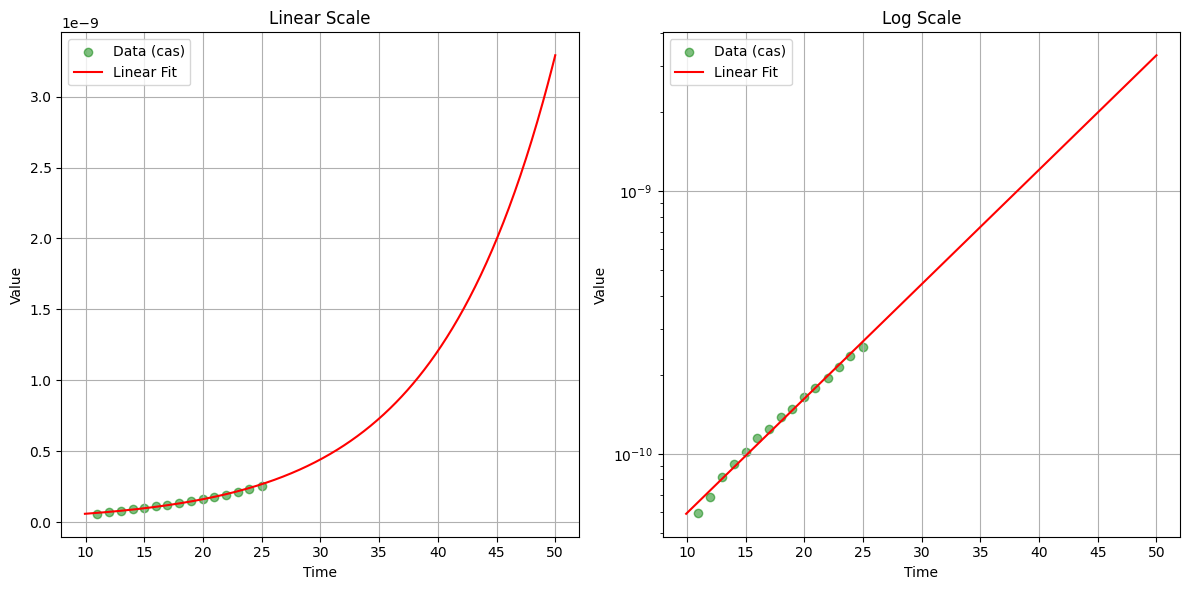

In [2]:
mask_2 = m > m0
t_filtered_2 = t[mask_2]
m_filtered_2 = m[mask_2]

m_filtered_log_2 = np.log(m_filtered_2)
coefficients_2 = np.polyfit(t_filtered_2, m_filtered_log_2, 1)

b_opt_2 = coefficients_2[0]  # 斜率
a_opt_log_2 = coefficients_2[1]  # 截距
a_p_2 = np.exp(a_opt_log_2)

print("\n=== Linear Fit on log(m) ===")
print(f"ln(a_2): {a_opt_log_2:.10f}")
print(f"a_2 (exp of intercept): {a_p_2:.10f}")
print(f"b_2 (slope): {b_opt_2:.10f}")

t_cas_final_2 = np.linspace(transition_cas,50, 500)
simple_exponential_fit_2 = a_p_2 * np.exp(b_opt_2 * t_cas_final_2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(t_filtered_2, m_filtered_2, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final_2, simple_exponential_fit_2, 'r-', label='Linear Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Scale')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(t_filtered_2, m_filtered_2, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final_2, simple_exponential_fit_2, 'r-', label='Linear Fit')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Log Scale')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


t1: 9.9426553224
alpha0: 0.2628444233
alpha1: 0.1003419756
Optimized w: 0.263732


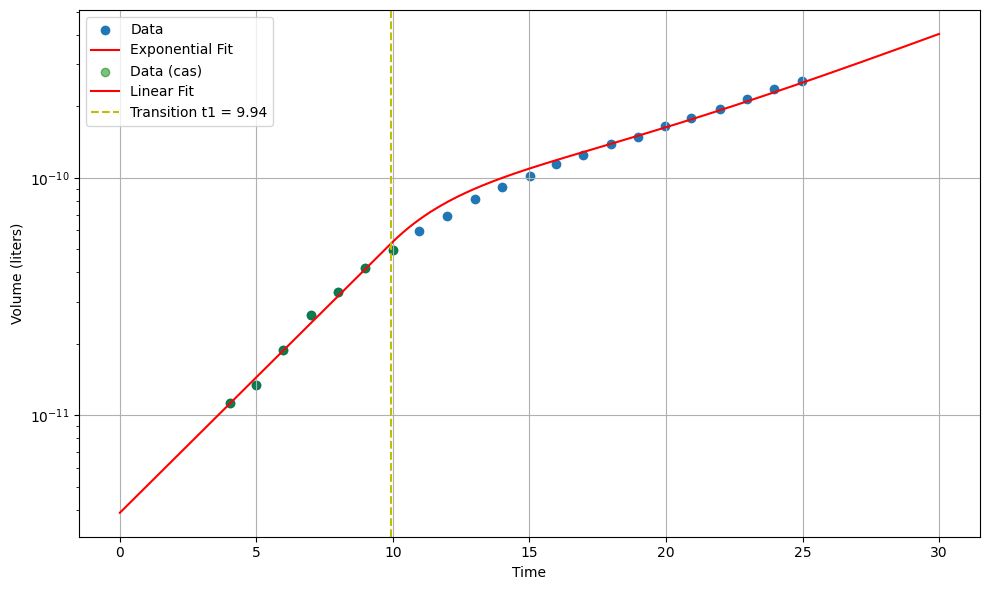

In [3]:
from scipy.optimize import differential_evolution

# === 参数设置 ===
gamma1 = 2 / 3
gamma2 = 8 / 9
beta = 3 / 4
exponent = 1 - beta

t1 = transition_cas
alpha0 = b_opt
alpha1 = b_opt_2

print(f"t1: {t1:.10f}")
print(f"alpha0: {alpha0:.10f}")
print(f"alpha1: {alpha1:.10f}")

# === 定义指数增长模型 ===
def exponential_phase_t(x, w, alpha0, alpha1):
    return m_tran * np.exp((alpha0 - alpha1) * np.exp(-w * (x - t1)) * (x - t1) + alpha1 * (x - t1))

# === 定义损失函数（MSE）===
def loss(w):
    predicted = exponential_phase_t(t_filtered_2, w, alpha0, alpha1)
    return np.sum((m_filtered_2 - predicted) ** 2)  # 计算均方误差

# === 使用差分进化算法优化 w ===
bounds = [(0.1, 0.5)]  # w 的取值范围
result = differential_evolution(loss, bounds)
w_opt = result.x[0]

print(f"Optimized w: {w_opt:.6f}")

# === 绘制拟合结果 ===
tt = np.linspace(t1, 30, 200)
mt_fit = exponential_phase_t(tt, w_opt, alpha0, alpha1)

plt.figure(figsize=(10, 6))
plt.scatter(t, m, label='Data')  # 确保 t 和 m 是你的数据
plt.plot(tt, mt_fit, 'r-', label='Exponential Fit')
plt.scatter(t_filtered, m_filtered, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final, simple_exponential_fit, 'r-', label='Linear Fit')
plt.axvline(t1, color='y', linestyle='--', label=f'Transition t1 = {t1:.2f}')
plt.xlabel('Time')
plt.ylabel('Volume (liters)')
#plt.title('Exponential Phase Fit')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

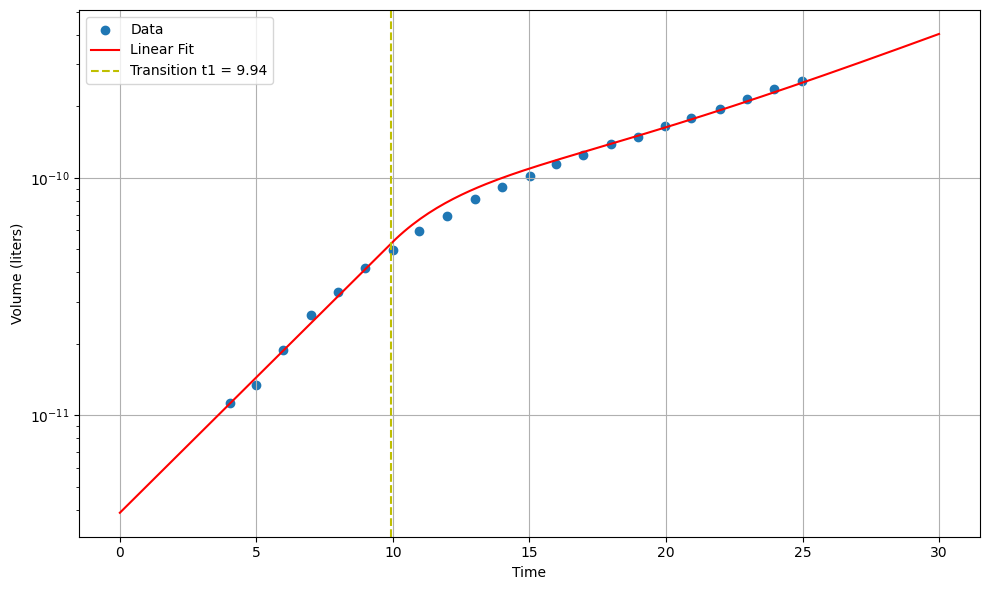

In [4]:
def piecewise_mt(x):
    x = np.asarray(x)
    result = np.zeros_like(x, dtype=float)    
    mask_1 = (x <= t1)
    mask_2 = (x > t1) 
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1]) 
    if np.any(mask_2):
        result[mask_2] = exponential_phase_t(x[mask_2], w_opt, alpha0, alpha1)
    return result.squeeze() 

tt_plt = np.linspace(0, 30, 200)
mt_plt = piecewise_mt(tt_plt)

plt.figure(figsize=(10, 6))
plt.scatter(t, m, label='Data') 
plt.plot(tt_plt, mt_plt, 'r-', label='Linear Fit')
plt.axvline(t1, color='y', linestyle='--', label=f'Transition t1 = {t1:.2f}')
plt.xlabel('Time')
plt.ylabel('Volume (liters)')
#plt.title('Exponential Phase Fit')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

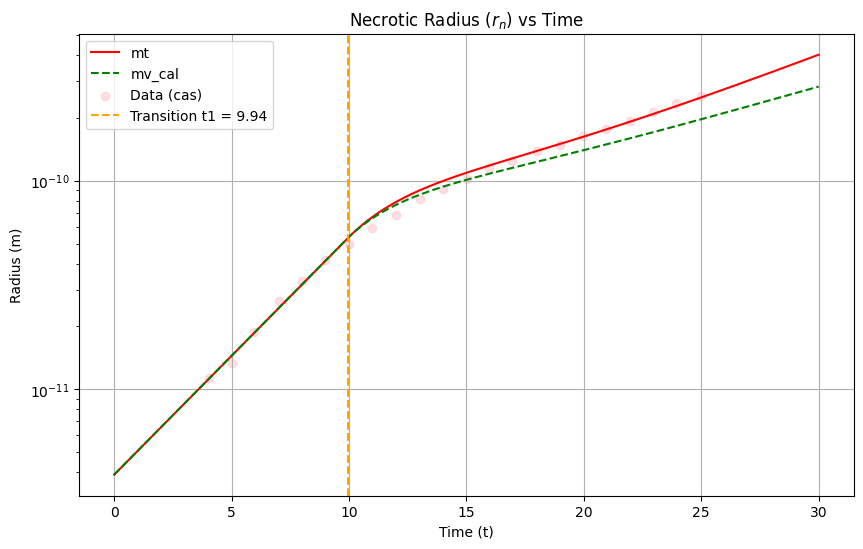

In [5]:
r_olist = (3 * mt_plt / (4 * np.pi)) ** (1/3)

def calculate_rn_rc(r_o, r_l):
    r_n = np.zeros_like(r_o)
    r_c = np.zeros_like(r_o)
    
    mask = r_o > r_l
    x = np.arccos(1 - 2 * (r_l**2) / (r_o[mask]**2)) / 3 - 2 * np.pi / 3
    r_c[mask] = r_o[mask] * (0.5 + np.cos(x))
    r_n[mask] = r_o[mask] - r_c[mask]
    
    r_c[~mask] = r_o[~mask]
    
    return r_n, r_c

r_n, r_c = calculate_rn_rc(r_olist, r_l)

m_n = 4/3*np.pi*((r_n)**3)
mv_cal = mt_plt - m_n

plt.figure(figsize=(10, 6))
#plt.plot(tt_plt, mv_plt, 'b-', label='mv')
plt.plot(tt_plt, mt_plt, 'r-', label='mt')
plt.plot(tt_plt, mv_cal, 'g--', label='mv_cal')
#plt.plot(tt_plt, m_n, 'g--', label='m_n')
plt.scatter(t, m, color='pink', alpha=0.5, label='Data (cas)')
plt.yscale('log')
plt.axvline(transition_cas, color='Orange', linestyle='--', label=f'Transition t1 = {transition_cas:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('Radius (m)')
plt.title('Necrotic Radius ($r_n$) vs Time')
plt.legend()
plt.grid(True)
plt.show()

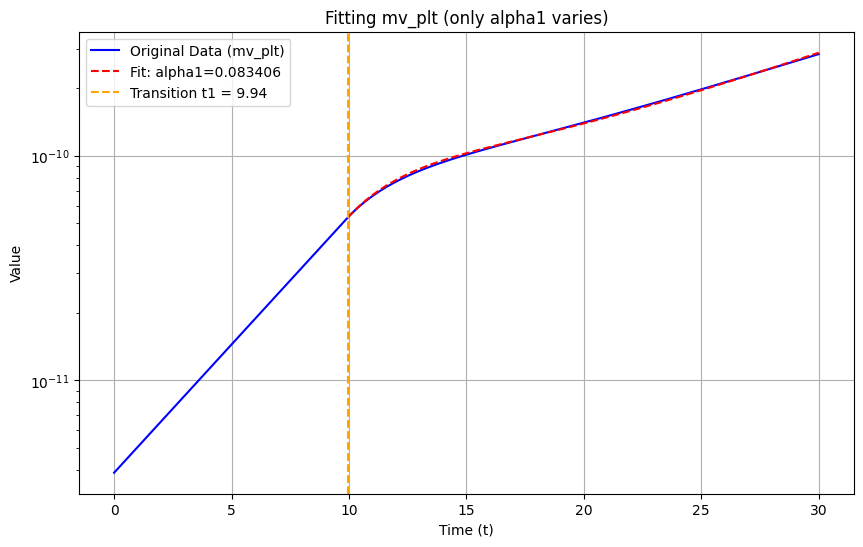

Fitted parameters:
alpha0 = 0.262844
alpha1 = 0.083406
w = 0.263732


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 假设以下参数已经定义：
# w_opt, m_tran, alpha0, t1, tt_plt, mv_plt, alpha1 (初始猜测值)

# 定义要拟合的函数（仅 alpha1 是变量）
def func(x, alpha1_v):
    return m_tran * np.exp((alpha0 - alpha1_v) * np.exp(-w_opt * (x - t1)) * (x - t1) + alpha1_v * (x - t1))

# 初始猜测参数（alpha1 的初始值）
initial_guess = [alpha1]  # 确保 alpha1 是一个标量值

# 确保只在 t >= t1 的数据上进行拟合
mask = tt_plt >= t1
x_data = tt_plt[mask]
y_data = mv_cal[mask]

# 执行拟合（仅 alpha1 是变量）
popt, pcov = curve_fit(func, x_data, y_data, p0=initial_guess, maxfev=10000)

# 提取拟合参数（popt 是数组，取第一个元素）
alpha1_fit = popt[0]  # 关键修改：取标量值

# 计算拟合曲线
tt_fitv = np.linspace(transition_cas, 30, 200)
fit_curve = func(tt_fitv, alpha1_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(tt_plt, mv_cal, 'b-', label='Original Data (mv_plt)')
plt.plot(tt_fitv, fit_curve, 'r--', label=f'Fit: alpha1={alpha1_fit:.6f}')
plt.axvline(t1, color='orange', linestyle='--', label=f'Transition t1 = {t1:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.yscale('log')
plt.title('Fitting mv_plt (only alpha1 varies)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f"Fitted parameters:")
print(f"alpha0 = {alpha0:.6f}")
print(f"alpha1 = {alpha1_fit:.6f}")  # 现在 alpha1_fit 是标量，可以格式化
print(f"w = {w_opt:.6f}")

In [7]:
gamma_fit = alpha1_fit/alpha1
print(f"gamma_fit = {gamma_fit:.12f}")

gamma_fit = 0.831220392881


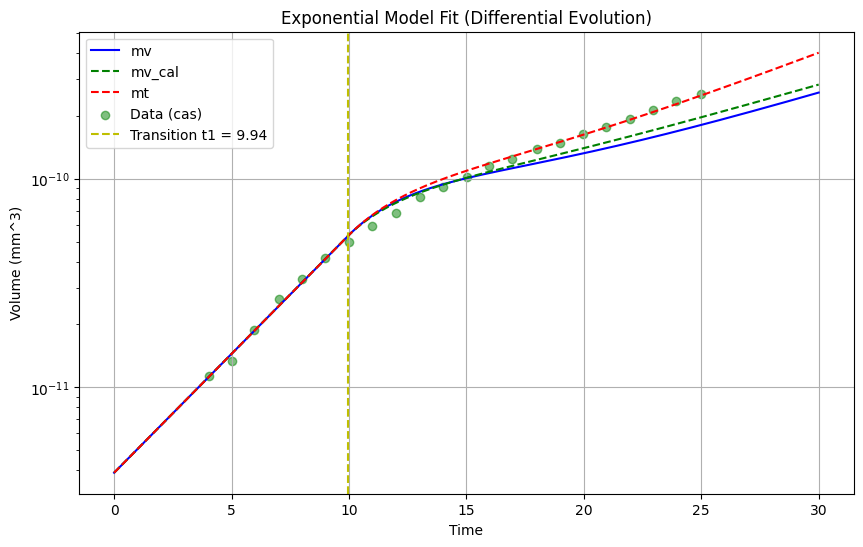

3.883144472294035e-12


In [8]:
gamma1 = 0.78

def exponential_phase_v(x):
    return m_tran * np.exp((alpha0-alpha1*gamma1)*np.exp(-w_opt*(x-t1))*(x-t1) + alpha1*gamma1*(x-t1))

def piecewise_function_mv(x):
    x = np.asarray(x)
    result = np.zeros_like(x, dtype=float) 
    
    mask_1 = (x <= t1)
    mask_exp = (x > t1) 

    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_v(x[mask_exp])

    return result.squeeze() 

mv_plt = piecewise_function_mv(tt_plt)

plt.figure(figsize=(10, 6))
plt.plot(tt_plt, mv_plt, 'b-', label='mv')
plt.plot(tt_plt, mv_cal, 'g--', label='mv_cal')
plt.plot(tt_plt, mt_plt, 'r--', label='mt')
plt.scatter(t, m, color='g', alpha=0.5, label='Data (cas)')
plt.axvline(transition_cas, color='y', linestyle='--', label=f'Transition t1 = {transition_cas:.2f}')
plt.xlabel('Time')
plt.ylabel('Volume (mm^3)')
plt.title('Exponential Model Fit (Differential Evolution)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()    
print(mt_plt[0])

In [9]:
from scipy.optimize import fsolve
from scipy.optimize import brentq

def find_time_for_mv(mv_target, t_max=1e5):
    mv_at_t1 = a_p * np.exp(b_opt * t1)
    
    if mv_target <= mv_at_t1:
        return np.log(mv_target / a_p) / b_opt
    else:
        def equation(t_unknown):
            x = t_unknown - t1
            return m_tran * np.exp(
                (alpha0 - alpha1 * gamma1) * np.exp(-w_opt * x) * x + alpha1 * gamma1 * x
            ) - mv_target
        
        try:
            return brentq(equation, t1, t_max, rtol=1e-10)
        except ValueError:
            return np.nan

mv_test = 6.658800000000007e-11
t_solution = find_time_for_mv(mv_test)
print(f" time when mv={mv_test} is: {t_solution}")
qq = piecewise_function_mv(14.888945178701382)
print(f"calculated is: {qq*1e15}")

 time when mv=6.658800000000007e-11 is: 10.989312114449604
calculated is: 99967.48213622152


In [25]:
def find_time_for_mt(mt_target,t_max=1e5):
    mt_at_t1 = a_p * np.exp(b_opt * t1)  
    #print(mv_target)
    if mt_target <= mt_at_t1:
        return np.log(mt_target / a_p) / b_opt
    else:
        def equation(t_unknown):
            x = t_unknown - t1
            return m_tran * np.exp(
                (alpha0 - alpha1 ) * np.exp(-w_opt * x) * x + alpha1 * x
            ) - mt_target       
        try:
            return brentq(equation, t1, t_max, rtol=1e-10)
        except ValueError:
            return np.nan


mt_test = 4 * np.pi / 3 * ((247.38e-6 / 2) ** 3)
t_solution = find_time_for_mt(mt_test)
print(f"time when mt={mt_test} is: {t_solution}")
qq = piecewise_mt(t_solution-3.9)
print(f"calculated is: {qq}")
rr = (3 * qq / (4 * np.pi)) ** (1/3)
print(f"rr is: {rr}")

mt_test2 = 6.658800000000007e-11
t_solution2 = find_time_for_mt(6.658800000000007e-11)
print(f"time when mt={mt_test2} is: {t_solution2}")


time when mt=7.926699197005607e-12 is: 2.714881453555191
calculated is: 2.8438064540503526e-12
rr is: 8.788953000735059e-05
time when mt=6.658800000000007e-11 is: 10.960045569057721


In [21]:
from math import acos, cos, pi

r_l = 233e-6  # 
PI = pi
oxic = 100
phy = 0
p = 0.04
q = 0.64
oxygen_half = 6.84  
OER_0 = 2.3
p_number = 10000

HCT_2Gy = pd.read_csv('A_cellular_automaton_2Gy.csv')
t_HCT2 = HCT_2Gy['x'].astype(float).values
d_HCT2 = HCT_2Gy['Curve1'].astype(float).values * 1e-6
m_HCT2 = 4 * np.pi / 3 * ((d_HCT2 / 2) ** 3)

HCT_5Gy = pd.read_csv('A_cellular_automaton_5Gy.csv')
t_HCT5 = HCT_5Gy['x'].astype(float).values
d_HCT5 = HCT_5Gy['Curve1'].astype(float).values * 1e-6
m_HCT5 = 4 * np.pi / 3 * ((d_HCT5 / 2) ** 3)

def calculate_rn_rc(r_o, r_l):
    if r_o > r_l:
        arg = 1 - 2 * (r_l**2) / (r_o**2)
        arg = max(min(arg, 1.0), -1.0)
        x = acos(arg) / 3 - 2*pi/3
        r_c = r_o * (0.5 + cos(x))
        r_n = r_o - r_c
    else:
        r_c = r_o
        r_n = 0.0
    return r_n, r_c

def phi(p, r_n, r0):
    term1 = r0**2
    term2 = (2 * r_n**3) / r0
    term3 = (6 * D * (p - p0)) / (V * a)
    return term1 + term2 + term3

def rp(p, r_n, r0):
    phi_val = phi(p, r_n, r0)
    with np.errstate(invalid='ignore'):
        inner = (3 * r_n**2 / phi_val)**1.5
        inner = max(min(inner, 1.0), -1.0)
        result = 2 * np.sqrt(phi_val/3) * np.cos(np.arccos(-inner)/3)
        return result if not np.isnan(result) else 0

def survival_100(x, oxygen, oxygen_half):
    x_arr = np.asarray(x, dtype=float)
    oxygen_arr = np.asarray(oxygen, dtype=float)    
    OER = (oxygen_arr + oxygen_half) / (oxygen_arr + oxygen_half/OER_0)
    S1 = (1 + (q * x_arr / OER))
    S2 = np.exp(-x_arr * (p + q) / OER)
    return S1 * S2

In [50]:
##################### t as a parameter
#simulate_tumor_growth(r0_microns, num_radiations, x_dose, delay_time, frac_time,af_time,apart_ratio_list)
def tumor_growth(t,r0_microns, num_radiations, x_dose, delay_time, frac_time,af_time,apart_ratio_list):
    ######################### day 0
    r0 = r0_microns
    r_n, r_c = calculate_rn_rc(r0, r_l)
    v_initial = (4/3) * PI * r0**3
    p_values = np.linspace(0, 100, 10000)
    rp_values = np.array([rp(p, r_n, r0) for p in p_values])
    rp_pos = np.nan_to_num(rp_values, nan=0)
    V_viable_list = []
    for j in range(len(p_values)):
        if j == 0:
            vol = (4/3) * PI * rp_pos[j]**3 
        else:
            delta_V = (4/3) * PI * (rp_pos[j]**3 - rp_pos[j-1]**3)
            vol = delta_V
        V_viable_list.append(vol)
    total_volume = sum(V_viable_list)
    necrosis_volume = V_viable_list[0]
    V_viable_array = np.array([v for v in V_viable_list])  
    current_V_viable = V_viable_array.copy()
    #print(f"necrosis_volume: {necrosis_volume} ")
    #print(f"total volume: {sum(V_viable_array)} ")
    viable_number = sum(V_viable_array[1:])
    #print(f"viable_number: {viable_number} ")
    s = []
    all_V_viable = []
    all_labels = []   
    all_V_viable.append(current_V_viable.copy())
    all_labels.append("Initial")   
    survival_ratio_list=np.ones(70)

    if (t < 0):
        t_minus = find_time_for_mt(total_volume)
        result = piecewise_mt(t_minus + t)
        return result
    
    for radiation in range(num_radiations):
        survival = np.zeros(len(p_values))
        for j in range(len(p_values)):
            oxygen_j = p_values[j]
            ad = float(survival_100(x_dose, oxygen_j, oxygen_half))
            survival[j] = ad * current_V_viable[j]
        survival[0] = 0
        survival_number = sum(survival)
        survival_ratio = survival_number/sum(current_V_viable[1:]) 
        #print(f"t: {t}")
        #survival_ratio_list[delay_time+radiation] = survival_ratio  ###########################
        idx = delay_time + radiation  ###################################################
        #survival_ratio_list[idx:idx+10] *= survival_ratio * k  ####################################
        #survival_ratio_list[idx] = survival_ratio####################################
        necrosis_volume += viable_number*(1 - survival_ratio_list[radiation])
        viable_number = viable_number * survival_ratio_list[radiation]
        necrosis_volume *= apart_ratio_list[radiation]
        total_number = viable_number + necrosis_volume
        
        if radiation < delay_time:
            t_cal = find_time_for_mt(total_number)
            #print(f"total_number before growth: {total_number}")
            total_number = piecewise_mt(t_cal + 1)
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n, _ = calculate_rn_rc(test_radius, r_l)
            necrosis_volume = (4/3) * pi * r_n**3
            viable_number = (4/3) * pi * test_radius**3 - (4/3) * pi * r_n**3
            #print(f"viable_number: {viable_number}")
            #print(f"total_number: {total_number}")
            rp_values = np.array([rp(p, r_n, test_radius) for p in p_values])
            rp_pos = np.nan_to_num(rp_values, nan=0)
            V_viable_list = []
            for j in range(len(p_values)):
                if j == 0:
                    vol = (4/3) * PI * rp_pos[j]**3 
                else:
                    delta_V = (4/3) * PI * (rp_pos[j]**3 - rp_pos[j-1]**3)
                    vol = delta_V
                V_viable_list.append(vol)
            V_viable_array = np.array([v for v in V_viable_list])  
            current_V_viable = V_viable_array.copy()
            all_V_viable.append(current_V_viable.copy())    
            if (t >= radiation) and (t < radiation + 1):
                result = piecewise_mt(t_cal + (t-radiation))
                return result
        else:
            t_cal = find_time_for_mv(viable_number)
            viable_number = piecewise_function_mv(t_cal + frac_time)
            total_number = viable_number + necrosis_volume
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n_new, _ = calculate_rn_rc(test_radius, r_l)
            rp_new = np.array([rp(p, r_n_new, test_radius) for p in p_values])
            rp_new = np.nan_to_num(rp_new, nan=0)
            V_viable_list = []
            min_viable_rp = None
            r_n = (necrosis_volume *3/(4*pi))**(1/3)
            for j in range(0, len(p_values)):
                if rp_new[j] > r_n:
                    if min_viable_rp is None or rp_new[j] < min_viable_rp:
                        min_viable_rp = rp_new[j] 
                        min_j = j               
            for j in range(0, len(p_values)):
                if rp_new[j] > r_n:
                    vol = (4/3) * pi * (rp_new[j]**3 - rp_new[j-1]**3) 
                else:
                    vol = 0
                V_viable_list.append(vol)
            V_viable_list[min_j] = (4/3) * pi * (rp_new[min_j]**3) - necrosis_volume
            V_viable_array = np.array([v for v in V_viable_list])  
            current_V_viable = V_viable_array.copy()
            all_V_viable.append(current_V_viable.copy())
            if (t >= radiation) and (t < radiation + 1):
                result = piecewise_function_mv(t_cal +t -radiation) + necrosis_volume
                return result
            viable_number = piecewise_function_mv(t_cal + frac_time)
            total_number = viable_number + necrosis_volume
    #print(survival_ratio_list)
    #print(apart_ratio_list)
    for t_a in range(af_time):
        if num_radiations + t_a < delay_time:
            t_cal = find_time_for_mt(total_number)
            if (t >= num_radiations + t_a ) and (t < num_radiations + t_a + 1):
                result = piecewise_mt(t_cal + t -(num_radiations + t_a))
                return result
            total_number = piecewise_mt(t_cal + 1)
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n, _ = calculate_rn_rc(test_radius, r_l)
            necrosis_volume = (4/3) * pi * r_n**3
            viable_number = (4/3) * pi * test_radius**3 - (4/3) * pi * r_n**3           
        else:
            necrosis_volume += viable_number*(1 - survival_ratio_list[num_radiations+t_a])
            necrosis_volume *= apart_ratio_list[num_radiations+t_a]
            viable_fit = viable_number * survival_ratio_list[num_radiations+t_a] ################
            total_number = viable_fit + necrosis_volume
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n, _ = calculate_rn_rc(test_radius, r_l)
            r_necrosis = (necrosis_volume *3/(4*pi))**(1/3)
            if r_n < r_necrosis: 
                if (t >= num_radiations + t_a ) and (t < num_radiations + t_a + 1):
                    t_tt = find_time_for_mv(viable_fit)
                    result = piecewise_function_mv(t_tt + t -(num_radiations + t_a)) + necrosis_volume
                    return result
                t_af = find_time_for_mv(viable_fit)
                viable_number = piecewise_function_mv(t_af +1)
            else:
                if (t >= num_radiations + t_a ) and (t < num_radiations + t_a + 1):
                    t_tt = find_time_for_mt(total_number)
                    result = piecewise_mt(t_tt + t -(num_radiations + t_a))
                    return result
                t_af = find_time_for_mt(total_number)
                viable_number = piecewise_function_mv(t_af +1)
                necrosis_volume = piecewise_mt(t_af +1) - viable_number
                print(f"total_number: {total_number}")
                print(f"necrosis_volume: {necrosis_volume}")
            
apart_ratio_list = [1]*2
#apart_ratio_list.extend([0.7]*10)#####################################3
apart_ratio_list.extend([1]*25)
r0_microns = 100e-06

predicted_optimal_2gy = tumor_growth(10,r0_microns,1,2,2,1,25,apart_ratio_list)



total_number: 7.085856853804917e-12
necrosis_volume: 0.0
total_number: 9.216038010093484e-12
necrosis_volume: 0.0
total_number: 1.1986603505528036e-11
necrosis_volume: 0.0
total_number: 1.5590068469919388e-11
necrosis_volume: 0.0
total_number: 2.027682277007691e-11
necrosis_volume: 0.0
total_number: 2.637252956537114e-11
necrosis_volume: 0.0
total_number: 3.4300754292864824e-11
necrosis_volume: 0.0
total_number: 4.461239647653524e-11
necrosis_volume: 3.8363359119828787e-14


/n
/n
r_n = r_necrosis:1
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necrosis:4
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necrosis:4
r_n = r_necrosis:5
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necrosis:4
r_n = r_necrosis:5
r_n = r_necrosis:6
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necrosis:4
r_n = r_necrosis:5
r_n = r_necrosis:6
r_n = r_necrosis:7
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necrosis:4
r_n = r_necrosis:5
r_n = r_necrosis:6
r_n = r_necrosis:7
r_n = r_necrosis:8
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necrosis:4
r_n = r_necrosis:5
r_n = r_necrosis:6
r_n = r_necrosis:7
r_n = r_necrosis:8
r_n > r_necrosis:9,r_n=0.0000343489,r_necrosis = 0.0000209223
/n
r_n = r_necrosis:1
r_n = r_necrosis:2
r_n = r_necrosis:3
r_n = r_necr

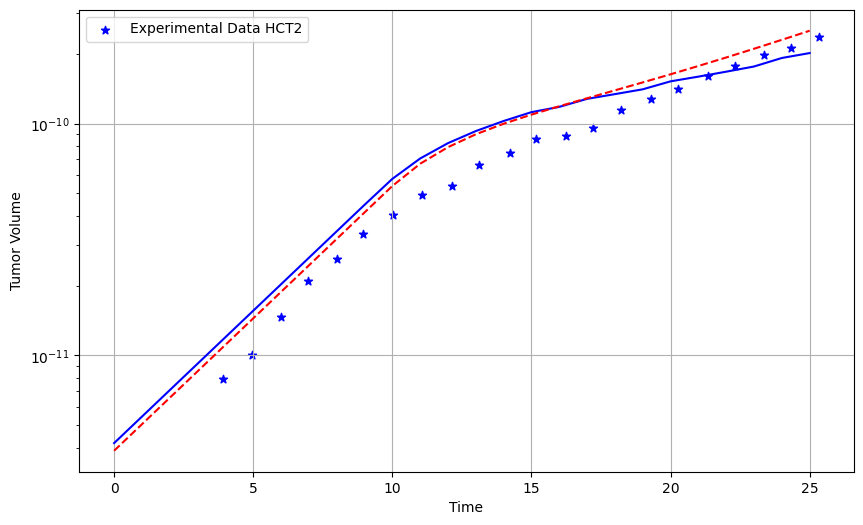

[array(4.1887902e-12), array(5.44804256e-12), array(7.08585685e-12), array(9.21603801e-12), array(1.19866035e-11), array(1.55900685e-11), array(2.02768228e-11), array(2.63725296e-11), array(3.43007543e-11), array(4.46123965e-11), array(5.77407792e-11), array(7.0695133e-11), array(8.23279069e-11), array(9.28232844e-11), array(1.02569619e-10), np.float64(1.1200307737110698e-10), array(1.18016025e-10), np.float64(1.277931631212312e-10), np.float64(1.3394730028496042e-10), array(1.40508223e-10), np.float64(1.520822702858094e-10), np.float64(1.593618462787065e-10), np.float64(1.6737937871485805e-10), array(1.76239412e-10), np.float64(1.9176394166346294e-10), np.float64(2.0137148693468691e-10)]


In [67]:
##################### t as a parameter
#simulate_tumor_growth(r0_microns, num_radiations, x_dose, delay_time, frac_time,af_time,apart_ratio_list)
def tumor_growth(t,r0_microns, num_radiations, x_dose, delay_time, frac_time,af_time,apart_ratio_list):
    ######################### day 0
    r0 = r0_microns
    r_n, r_c = calculate_rn_rc(r0, r_l)
    v_initial = (4/3) * PI * r0**3
    p_values = np.linspace(0, 100, 10000)
    rp_values = np.array([rp(p, r_n, r0) for p in p_values])
    rp_pos = np.nan_to_num(rp_values, nan=0)
    V_viable_list = []
    for j in range(len(p_values)):
        if j == 0:
            vol = (4/3) * PI * rp_pos[j]**3 
        else:
            delta_V = (4/3) * PI * (rp_pos[j]**3 - rp_pos[j-1]**3)
            vol = delta_V
        V_viable_list.append(vol)
    total_volume = sum(V_viable_list)
    necrosis_volume = V_viable_list[0]
    V_viable_array = np.array([v for v in V_viable_list])  
    current_V_viable = V_viable_array.copy()
    #print(f"necrosis_volume: {necrosis_volume} ")
    #print(f"total volume: {sum(V_viable_array)} ")
    viable_number = sum(V_viable_array[1:])
    #print(f"viable_number: {viable_number} ")
    s = []
    all_V_viable = []
    all_labels = []   
    all_V_viable.append(current_V_viable.copy())
    all_labels.append("Initial")   
    survival_ratio_list=np.ones(70)

    if (t < 0):
        t_minus = find_time_for_mt(total_volume)
        result = piecewise_mt(t_minus + t)
        return result
    
    for radiation in range(num_radiations):
        survival = np.zeros(len(p_values))
        for j in range(len(p_values)):
            oxygen_j = p_values[j]
            ad = float(survival_100(x_dose, oxygen_j, oxygen_half))
            survival[j] = ad * current_V_viable[j]
        survival[0] = 0
        survival_number = sum(survival)
        survival_ratio = survival_number/sum(current_V_viable[1:]) 
        #print(f"t: {t}")
        #survival_ratio_list[delay_time+radiation] = survival_ratio  ###########################
        idx = delay_time + radiation  ###################################################
        #survival_ratio_list[idx:idx+10] *= survival_ratio * k  ####################################
        #survival_ratio_list[idx] = survival_ratio####################################
        necrosis_volume += viable_number*(1 - survival_ratio_list[radiation])
        viable_number = viable_number * survival_ratio_list[radiation]
        necrosis_volume *= apart_ratio_list[radiation]
        total_number = viable_number + necrosis_volume
        
        if radiation < delay_time:
            t_cal = find_time_for_mt(total_number)
            #print(f"total_number before growth: {total_number}")
            total_number = piecewise_mt(t_cal + 1)
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n, _ = calculate_rn_rc(test_radius, r_l)
            necrosis_volume = (4/3) * pi * r_n**3
            viable_number = (4/3) * pi * test_radius**3 - (4/3) * pi * r_n**3
            #print(f"viable_number: {viable_number}")
            #print(f"total_number: {total_number}")
            rp_values = np.array([rp(p, r_n, test_radius) for p in p_values])
            rp_pos = np.nan_to_num(rp_values, nan=0)
            V_viable_list = []
            for j in range(len(p_values)):
                if j == 0:
                    vol = (4/3) * PI * rp_pos[j]**3 
                else:
                    delta_V = (4/3) * PI * (rp_pos[j]**3 - rp_pos[j-1]**3)
                    vol = delta_V
                V_viable_list.append(vol)
            V_viable_array = np.array([v for v in V_viable_list])  
            current_V_viable = V_viable_array.copy()
            all_V_viable.append(current_V_viable.copy())    
            if (t >= radiation) and (t < radiation + 1):
                result = piecewise_mt(t_cal + (t-radiation))
                return result
        else:
            t_cal = find_time_for_mv(viable_number)
            viable_number = piecewise_function_mv(t_cal + frac_time)
            total_number = viable_number + necrosis_volume
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n_new, _ = calculate_rn_rc(test_radius, r_l)
            rp_new = np.array([rp(p, r_n_new, test_radius) for p in p_values])
            rp_new = np.nan_to_num(rp_new, nan=0)
            V_viable_list = []
            min_viable_rp = None
            r_n = (necrosis_volume *3/(4*pi))**(1/3)
            for j in range(0, len(p_values)):
                if rp_new[j] > r_n:
                    if min_viable_rp is None or rp_new[j] < min_viable_rp:
                        min_viable_rp = rp_new[j] 
                        min_j = j               
            for j in range(0, len(p_values)):
                if rp_new[j] > r_n:
                    vol = (4/3) * pi * (rp_new[j]**3 - rp_new[j-1]**3) 
                else:
                    vol = 0
                V_viable_list.append(vol)
            V_viable_list[min_j] = (4/3) * pi * (rp_new[min_j]**3) - necrosis_volume
            V_viable_array = np.array([v for v in V_viable_list])  
            current_V_viable = V_viable_array.copy()
            all_V_viable.append(current_V_viable.copy())
            if (t >= radiation) and (t < radiation + 1):
                result = piecewise_function_mv(t_cal +t -radiation) + necrosis_volume
                return result
            viable_number = piecewise_function_mv(t_cal + frac_time)
            total_number = viable_number + necrosis_volume
    #print(survival_ratio_list)
    #print(apart_ratio_list)
    print(f"/n")
    for t_a in range(af_time):
        if num_radiations + t_a < delay_time:
            t_cal = find_time_for_mt(total_number)
            if (t >= num_radiations + t_a ) and (t < num_radiations + t_a + 1):
                result = piecewise_mt(t_cal + t -(num_radiations + t_a))
                return result
            total_number = piecewise_mt(t_cal + 1)
            test_radius = (total_number *3/(4*pi))**(1/3)
            r_n, _ = calculate_rn_rc(test_radius, r_l)
            necrosis_volume = (4/3) * pi * r_n**3
            viable_number = (4/3) * pi * test_radius**3 - (4/3) * pi * r_n**3           
        else:
            necrosis_volume += viable_number*(1 - survival_ratio_list[num_radiations+t_a])
            necrosis_volume *= apart_ratio_list[num_radiations+t_a]
            viable_fit = viable_number * survival_ratio_list[num_radiations+t_a] ################
            total_number = viable_fit + necrosis_volume
            test_radius2 = (total_number *3/(4*pi))**(1/3)
            r_n2, _ = calculate_rn_rc(test_radius2, r_l)
            r_necrosis = (necrosis_volume *3/(4*pi))**(1/3)
            if round(r_n2, 10) > round(r_necrosis, 10): 
                print(f"r_n > r_necrosis:{t_a},r_n={r_n2:.10f},r_necrosis = {r_necrosis:.10f}")
            if round(r_n2, 10) == round(r_necrosis, 10): 
                print(f"r_n = r_necrosis:{t_a}")
            if round(r_n2, 10) < round(r_necrosis, 10): 
                print(f"r_n < r_necrosis:{t_a},r_n={r_n2:.10f},r_necrosis = {r_necrosis:.10f}")
                
            if round(r_n2, 10) < round(r_necrosis, 10): 
                if (t >= num_radiations + t_a ) and (t < num_radiations + t_a + 1):
                    t_tt = find_time_for_mv(viable_fit)
                    result = piecewise_function_mv(t_tt + t -(num_radiations + t_a)) + necrosis_volume
                    return result
                t_af = find_time_for_mv(viable_fit)
                viable_number = piecewise_function_mv(t_af +1)
            else:
                if (t >= num_radiations + t_a ) and (t < num_radiations + t_a + 1):
                    t_tt = find_time_for_mt(total_number)
                    result = piecewise_mt(t_tt + t -(num_radiations + t_a))
                    return result
                t_af = find_time_for_mt(total_number)
                viable_number = piecewise_function_mv(t_af +1)
                necrosis_volume = piecewise_mt(t_af +1) - viable_number
                #print(f"total_number: {total_number}")
                #print(f"necrosis_volume: {necrosis_volume}")
            
apart_ratio_list = [1]*2
#apart_ratio_list.extend([0.7]*10)#####################################3
apart_ratio_list.extend([1]*25)
r0_microns = 100e-06

tt = np.linspace(0, 25, 26)
#tumor_growth(t,r0_microns, num_radiations, x_dose, delay_time, frac_time,af_time,apart_ratio_list)
'''
predicted_optimal_5gy = [tumor_growth(t,r0_microns,1,5,4,1,30,apart_ratio_list)
                     for t in tt]
'''
predicted_optimal_2gy = [tumor_growth(t,r0_microns,1,2,2,1,25,apart_ratio_list)
                        for t in tt]
g_compare = piecewise_mt(tt)

plt.figure(figsize=(10, 6))
plt.scatter(t_HCT2, m_HCT2, marker='*', color='blue', label='Experimental Data HCT2')
#plt.scatter(t_HCT5, m_HCT5, marker='*', color='red', label='Experimental Data HCT5')
plt.plot(tt, predicted_optimal_2gy, '-', color='blue')
plt.plot(tt, g_compare, '--', color='red')
#plt.plot(tt, predicted_optimal_5gy, '-', color='red')
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
print(predicted_optimal_2gy)

Best apart_ratio: 0.9900
Best delay_time: 2
Minimum MSE: 1.0887e-01


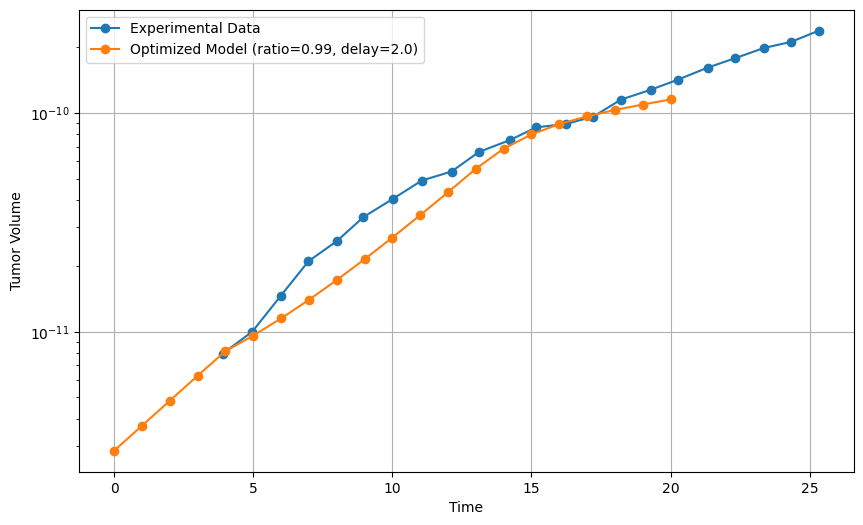

In [27]:
################### find best frac_time & apart_ratio_list

apart_ratio_candidates = np.linspace(0.7, 0.99, 20) 
delay_time_candidates = np.arange(2, 5)  
best_mse = float('inf')
best_apart_ratio = None
best_delay_time = None
#t_data, d_data
#tumor_growth(t,r0_microns,8,5,3,1,10,apart_ratio) 
for apart_ratio in apart_ratio_candidates:
    for delay_time in delay_time_candidates:
        apart_ratio_list = [1]*delay_time
        apart_ratio_list.extend([apart_ratio]*30)
        predicted_data = [
            tumor_growth(t,r0_microns,1,2,4,1,30,apart_ratio_list)
            for t in t_HCT2
        ]
        current_mse = np.mean((np.array(predicted_data) - m_HCT2) ** 2/(np.array(predicted_data) **2))
        
        if current_mse < best_mse:
            best_mse = current_mse
            best_apart_ratio = apart_ratio
            best_delay_time = delay_time

print(f"Best apart_ratio: {best_apart_ratio:.4f}")
print(f"Best delay_time: {best_delay_time}")
print(f"Minimum MSE: {best_mse:.4e}")

tt = np.linspace(0, 20, 21)
#tumor_growth(t,r0_microns, num_radiations, x_dose, delay_time, frac_time,af_time,apart_ratio)
apart_ratio_list = [1]*best_delay_time
apart_ratio_list.extend([best_apart_ratio]*30)
predicted_optimal = [tumor_growth(t,r0_microns,1,2,4,1,30,apart_ratio_list)
                     for t in tt]

plt.figure(figsize=(10, 6))
plt.plot(t_HCT2, m_HCT2, 'o-', label='Experimental Data')
plt.plot(tt, predicted_optimal, 'o-', label=f'Optimized Model (ratio={best_apart_ratio:.2f}, delay={best_delay_time:.1f})')
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

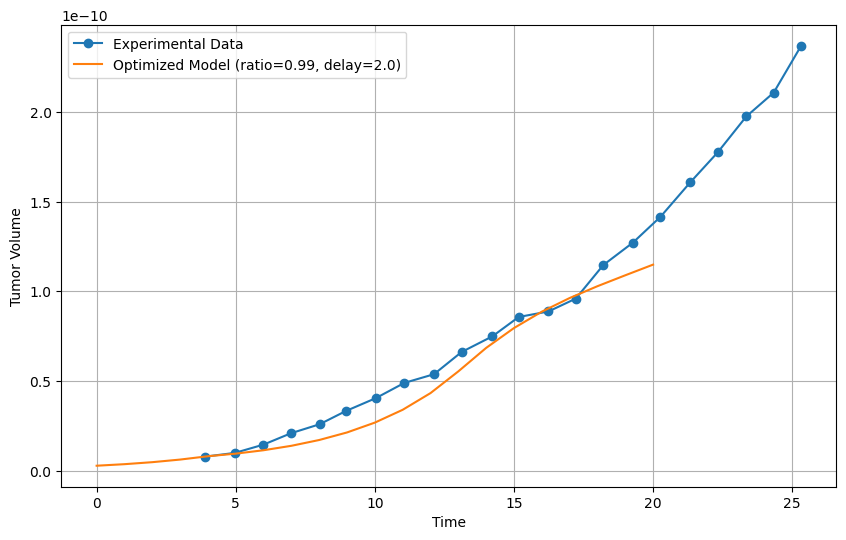

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(t_HCT2, m_HCT2, 'o-', label='Experimental Data')
plt.plot(tt, predicted_optimal, '-', label=f'Optimized Model (ratio={best_apart_ratio:.2f}, delay={best_delay_time:.1f})')
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

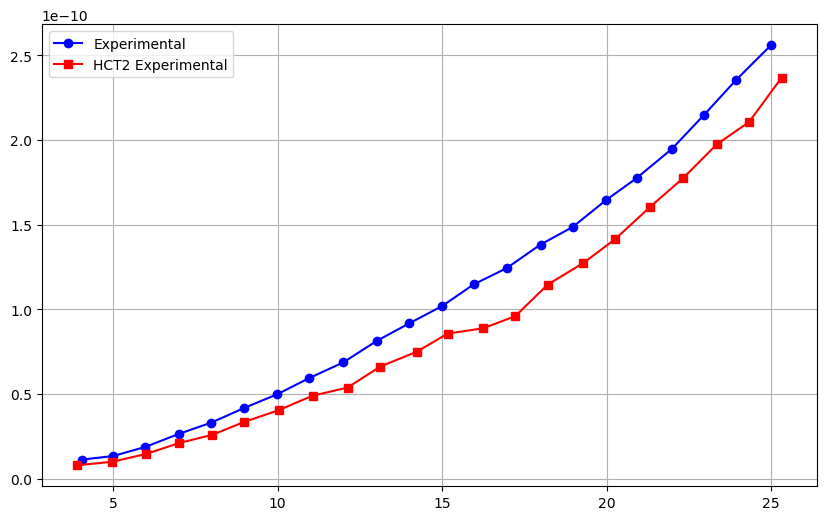

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(t, m, 'o-', color='blue', label='Experimental')
plt.plot(t_HCT2, m_HCT2, 's-', color='red', label='HCT2 Experimental') 
plt.legend()
#plt.yscale('log')
plt.grid(True)
plt.show()